Assignment no. 4
(Simple Linear Regresssion)


# Q1) Predict delivery time using sorting time
### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [3]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # used for data analysis and data maipulation  
import numpy as np # used for working with arrays
import seaborn as sns # used for visualization
from scipy.stats import norm # used statistics for normal distribution
from scipy.stats import skew # to handle skewness
import statsmodels.formula.api as smf # to Create a Model from a formula and dataframe
import matplotlib.pyplot as plt # used for visualization

In [5]:
dataset=pd.read_csv("/content/delivery_time.csv")

In [6]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


EDA And Data Visualization

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


FEATURE ENGINEERING

In [11]:
#Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
print(skew(dataset.delivery_time))

0.326702631656106


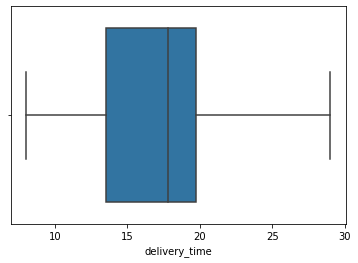

In [14]:
sns.boxplot(dataset['delivery_time'],orient='h')

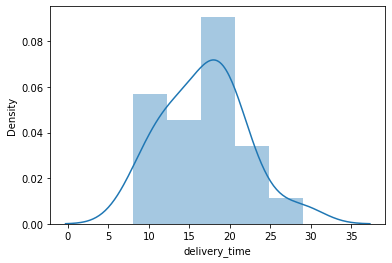

In [15]:
sns.distplot(dataset['delivery_time'])

In [16]:
print(skew(dataset.sorting_time))

0.043680994983108075


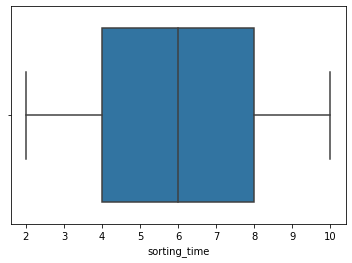

In [17]:
sns.boxplot(dataset['sorting_time'],orient='h')

# The observations for Sorting Time lies nearly between 4 to 8.
# It means the Sorting Time data is symmetric and skewed.
# The median sorting time is approximately around 6.

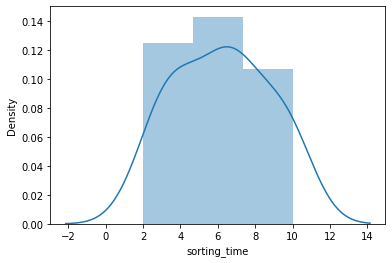

In [18]:
sns.distplot(dataset['sorting_time'])

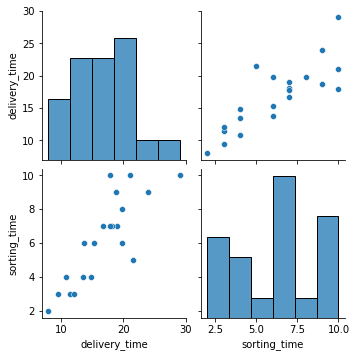

In [19]:
sns.pairplot(dataset)

Transformation for Continuous Variable

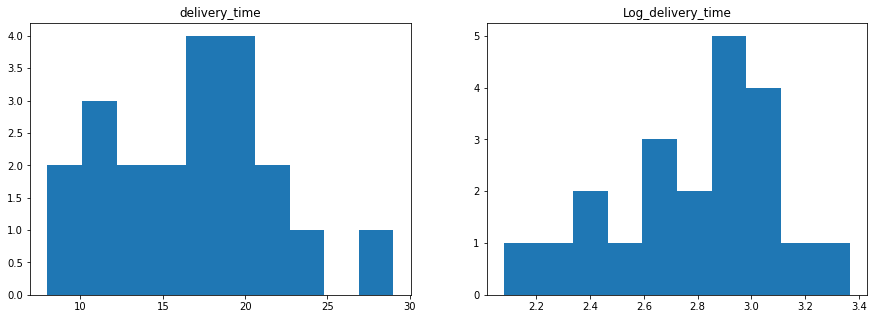

In [20]:
# log trasformation :
dataset['log_delivery_time']= np.log(dataset["delivery_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['delivery_time']);ax[0].set_title("delivery_time")
ax[1].hist(dataset['log_delivery_time']);ax[1].set_title("Log_delivery_time")
plt.show()

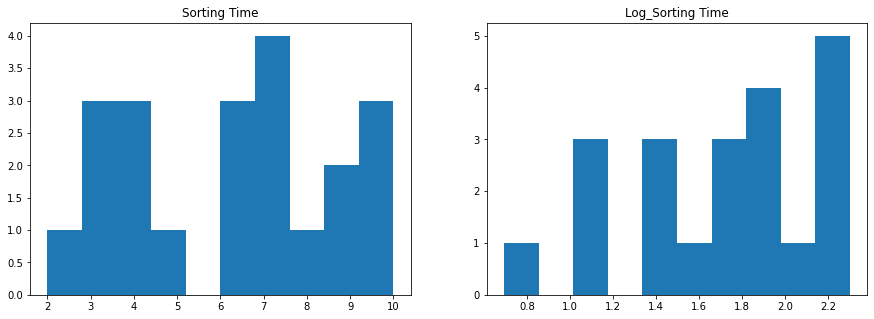

In [21]:
dataset['log_sorting_time']= np.log(dataset["sorting_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['sorting_time']);ax[0].set_title("Sorting Time")
ax[1].hist(dataset['log_sorting_time']);ax[1].set_title("Log_Sorting Time")
plt.show()

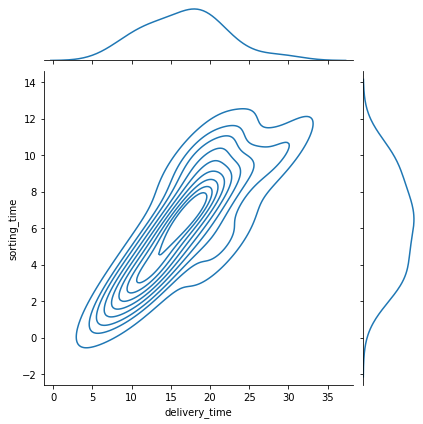

In [22]:
sns.jointplot(dataset['delivery_time'],dataset['sorting_time'], kind='kde')
plt.show()

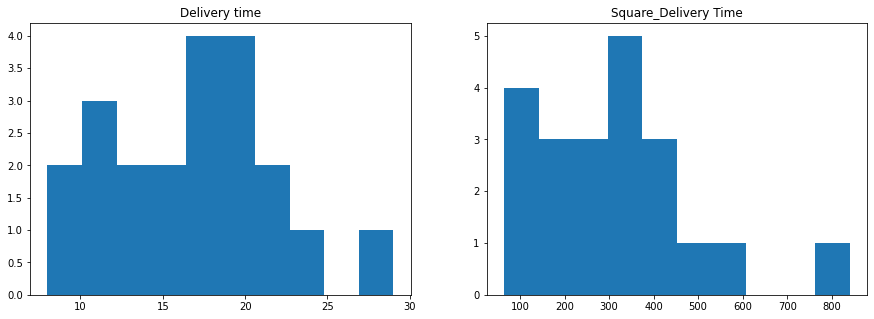

In [23]:
# square trasformation :
dataset['sqr_delivery_time']= np.square(dataset["delivery_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['delivery_time']);ax[0].set_title("Delivery time")
ax[1].hist(dataset['sqr_delivery_time']);ax[1].set_title("Square_Delivery Time")
plt.show()

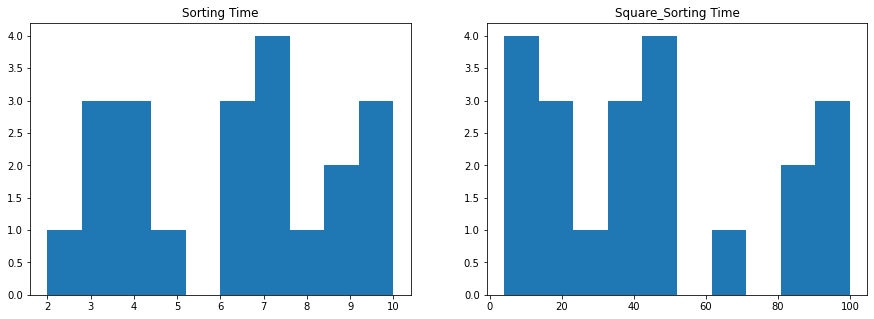

In [24]:
dataset['sqr_sorting_time']= np.square(dataset["sorting_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['sorting_time']);ax[0].set_title("Sorting Time")
ax[1].hist(dataset['sqr_sorting_time']);ax[1].set_title("Square_Sorting Time")
plt.show()

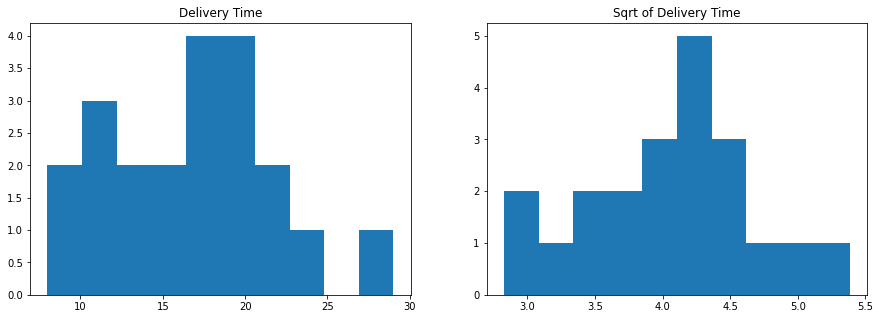

In [25]:
# square root trasformation :
dataset['sqrt_delivery_time']= np.sqrt(dataset["delivery_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['delivery_time']);ax[0].set_title("Delivery Time")
ax[1].hist(dataset['sqrt_delivery_time']);ax[1].set_title("Sqrt of Delivery Time")
plt.show()

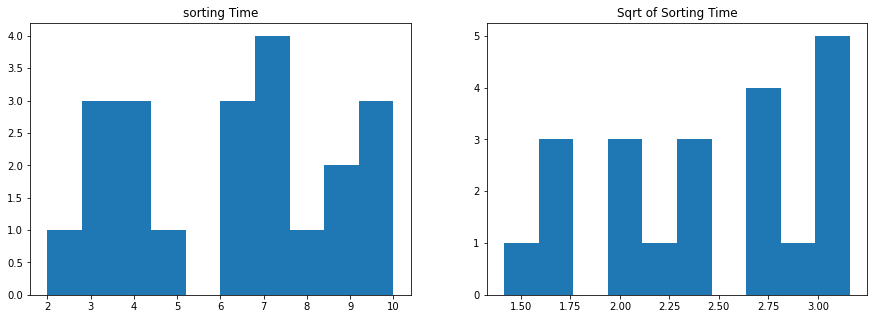

In [26]:
dataset['sqrt_sorting_time']= np.sqrt(dataset["sorting_time"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(dataset['sorting_time']);ax[0].set_title("sorting Time")
ax[1].hist(dataset['sqrt_sorting_time']);ax[1].set_title("Sqrt of Sorting Time")
plt.show()

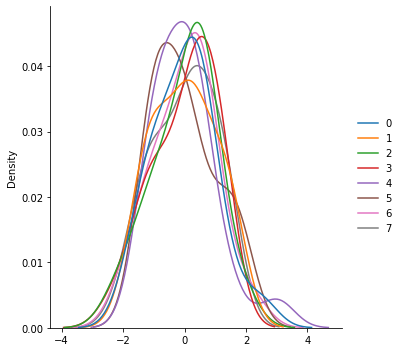

In [27]:
from sklearn.preprocessing import scale
dataset1 = dataset.values
dataset2 = scale(dataset1)  # Used to standardized the dataset
sns.displot(dataset2, kind='kde')
plt.show()

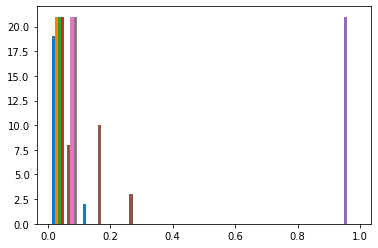

In [28]:
# Normalize Data set
from sklearn.preprocessing import normalize
dataset2 = normalize(dataset)
plt.hist(dataset2)
plt.show()

Model Building

In [30]:
model1=smf.ols("delivery_time~ sorting_time",data=dataset).fit()

Model Testing

In [31]:
#finding coefficient parameters
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [32]:
#finding tvalues and pvalues
model1.tvalues,model1.pvalues 

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [34]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        07:27:42   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#findings rsquared values
model1.rsquared,model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Model Prediction

In [37]:
#manual prediction for say sorting time 6
delivery_time=(6.582734)+(1.649020)*(6)

In [38]:
delivery_time

16.476854

In [40]:
#Automatic Prediction for sorting time 6,8
new_data=pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [41]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,8


In [42]:
model1.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64

from this we understand the model is best

Build a prediction model for salary_hike

### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [44]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [45]:
df=pd.read_csv("/content/Salary_Data.csv")

In [48]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


EDA and visualization

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [50]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Feature engineering

In [51]:
df = df.rename(columns={'YearsExperience':'YE','Salary':'Sal'}, inplace=False)
df.head()

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [52]:
print(skew(df.YE))

0.3603123252525561


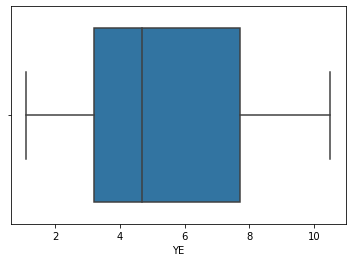

In [53]:
sns.boxplot(df['YE'],orient='h')

In [54]:
# The data for Year Experience is skewed right.
# All the observations lies in the intervals of approximately 3 to 8
# We can say that the median years of experience is 5.2 years.

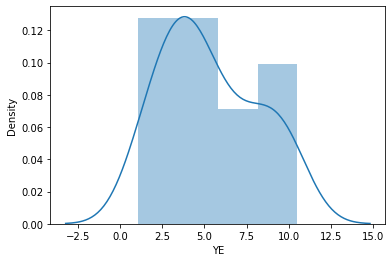

In [55]:
sns.distplot(df['YE'])

In [56]:
# The distribution of Year Experience data is slightly more on the right tail of the curve

In [57]:
print(skew(df.Sal))

0.3361618825592921


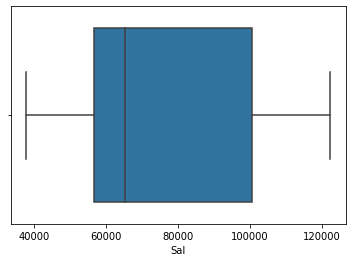

In [58]:
sns.boxplot(df['Sal'],orient='h')

In [59]:
# The observations for Salary lies nearly between 57000 to 110000.
# The data is skewed towars right side.
# The median Salary is nearly 65000.

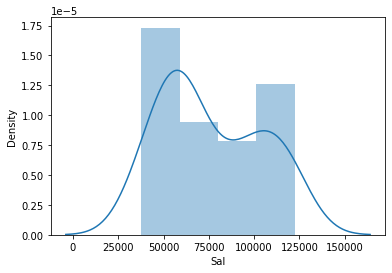

In [60]:
sns.distplot(df['Sal'])

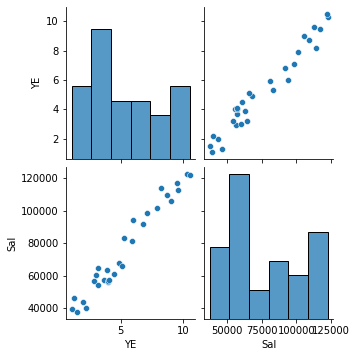

In [61]:
sns.pairplot(df)

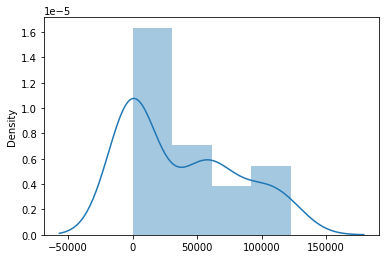

In [62]:
sns.distplot(df)

Correlation Analysis

In [63]:
df.corr()

,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


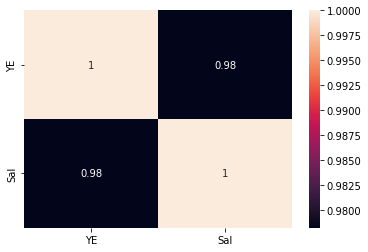

In [64]:
sns.heatmap(df.corr(),annot=True)


Transformation for continuous variable

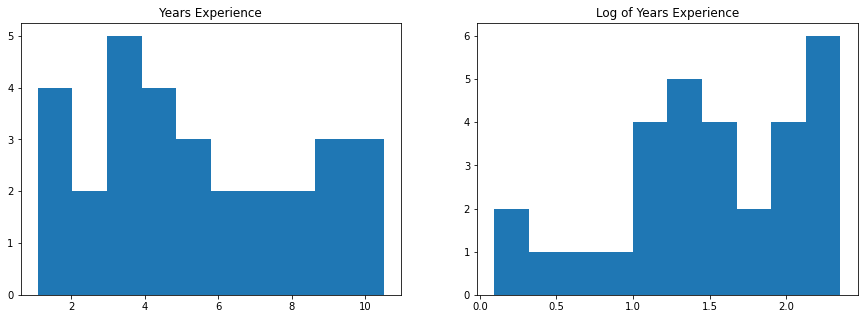

In [65]:
# log trasformation :
df['log_YE']= np.log(df["YE"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['YE']);ax[0].set_title("Years Experience")
ax[1].hist(df['log_YE']);ax[1].set_title("Log of Years Experience")
plt.show()

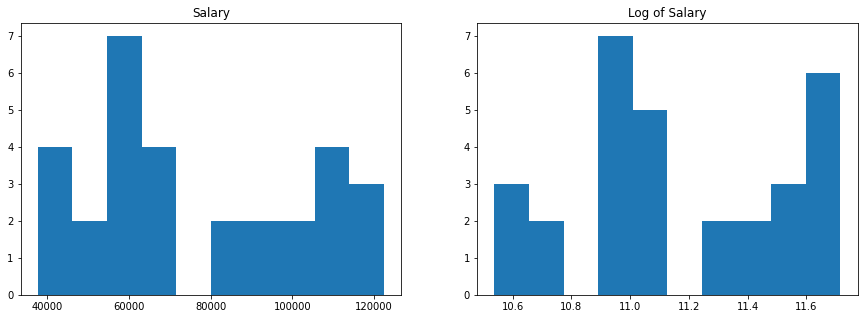

In [66]:
# log trasformation :
df['log_S']= np.log(df["Sal"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['Sal']);ax[0].set_title("Salary")
ax[1].hist(df['log_S']);ax[1].set_title("Log of Salary")
plt.show()

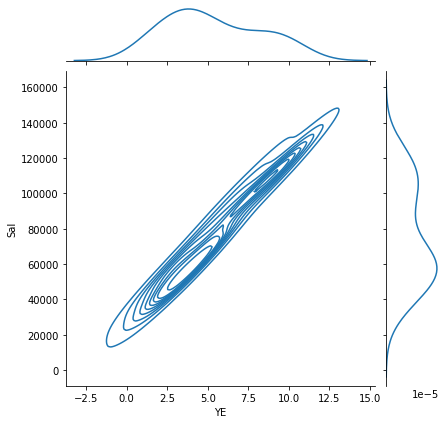

In [67]:
sns.jointplot(df['YE'],df['Sal'],kind='kde')

In [68]:
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

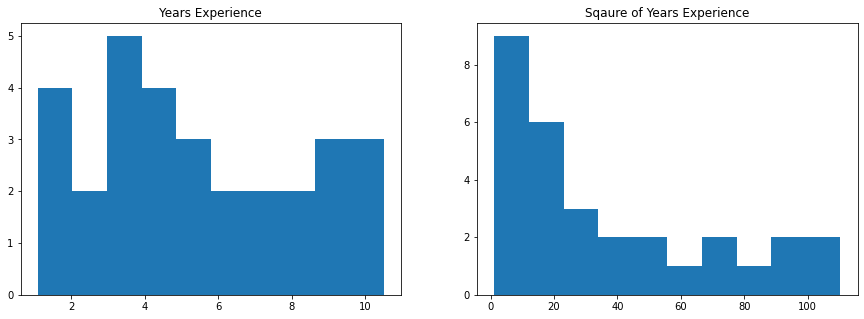

In [69]:
# square trasformation :
df['sqr_YE']= np.square(df["YE"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['YE']);ax[0].set_title("Years Experience")
ax[1].hist(df['sqr_YE']);ax[1].set_title("Sqaure of Years Experience")
plt.show()

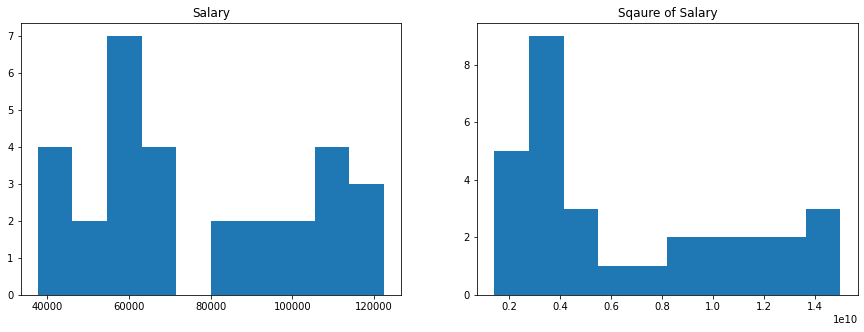

In [70]:
# square trasformation :
df['sqr_S']= np.square(df["Sal"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['Sal']);ax[0].set_title("Salary")
ax[1].hist(df['sqr_S']);ax[1].set_title("Sqaure of Salary")
plt.show()

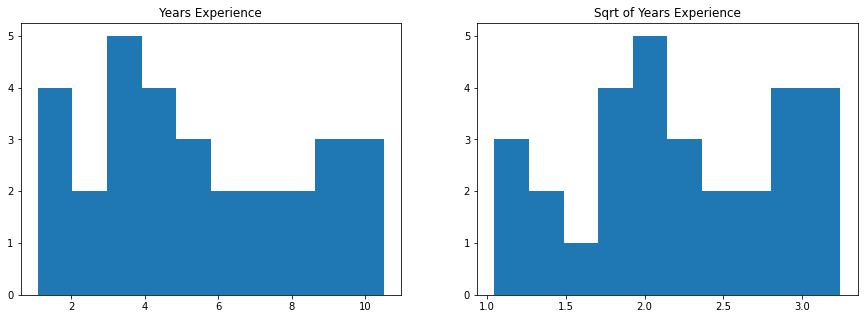

In [71]:
# square root trasformation :
df['sqrt_YE']= np.sqrt(df["YE"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['YE']);ax[0].set_title("Years Experience")
ax[1].hist(df['sqrt_YE']);ax[1].set_title("Sqrt of Years Experience")
plt.show()

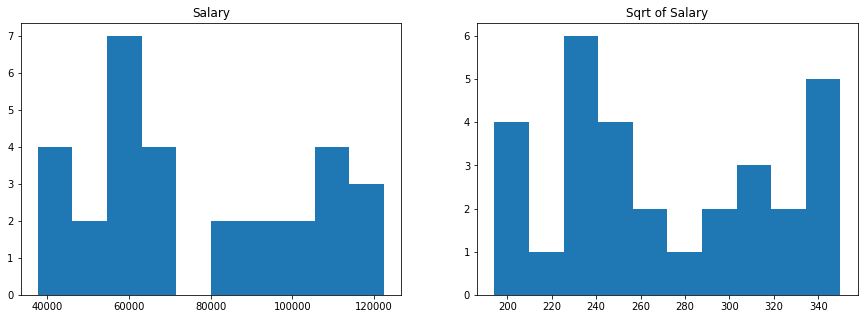

In [72]:
# square root trasformation :
df['sqrt_S']= np.sqrt(df["Sal"])

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].hist(df['Sal']);ax[0].set_title("Salary")
ax[1].hist(df['sqrt_S']);ax[1].set_title("Sqrt of Salary")
plt.show()

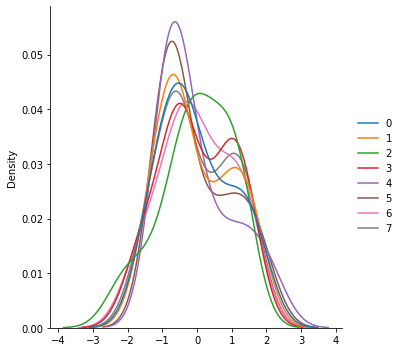

In [73]:
from sklearn.preprocessing import scale
df1 = df.values
df2 = scale(df1)  # Used to standardized the dataset
sns.displot(df2, kind='kde')
plt.show()

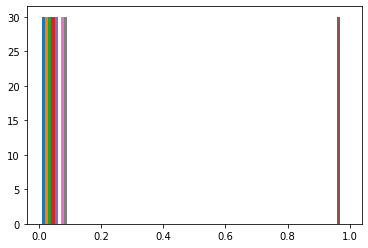

In [74]:
# Normalize Data set
from sklearn.preprocessing import normalize
df2 = normalize(df)
plt.hist(df2)
plt.show()
#df1

Correlation Analysis

In [75]:
df.corr()

,YE,Sal,log_YE,log_S,sqr_YE,sqr_S,sqrt_YE,sqrt_S
YE,1.000000,0.978242,0.953797,0.965384,0.977067,0.973105,0.989850,0.974595
Sal,0.978242,1.000000,0.924061,0.988531,0.956724,0.991647,0.964884,0.997315
log_YE,0.953797,0.924061,1.000000,0.951428,0.872019,0.886512,0.986620,0.939719
log_S,0.965384,0.988531,0.951428,1.000000,0.915775,0.961261,0.971269,0.996920
sqr_YE,0.977067,0.956724,0.872019,0.915775,1.000000,0.976774,0.937950,0.939218
sqr_S,0.973105,0.991647,0.886512,0.961261,0.976774,1.000000,0.943786,0.979669
sqrt_YE,0.989850,0.964884,0.986620,0.971269,0.937950,0.943786,1.000000,0.970541
sqrt_S,0.974595,0.997315,0.939719,0.996920,0.939218,0.979669,0.970541,1.000000


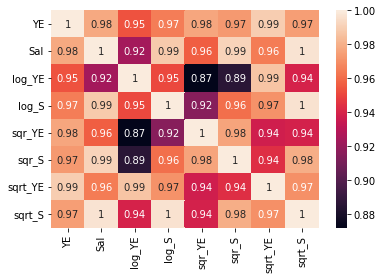

In [76]:
sns.heatmap(df.corr(),annot=True)

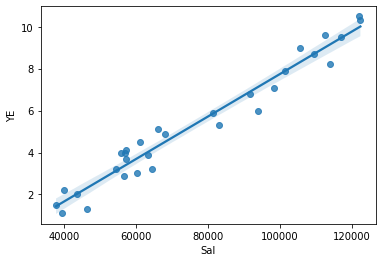

In [77]:
sns.regplot(x=df['Sal'],y=df['YE'])

Model building

In [78]:
model=smf.ols('Sal~YE',data=df).fit()

Model Testing

In [79]:
model.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        08:06:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
#finding tvalues and pvalues
model.tvalues,model.pvalues

(Intercept    11.346940
 YE           24.950094
 dtype: float64, Intercept    5.511950e-12
 YE           1.143068e-20
 dtype: float64)

In [84]:
#finding rsquared values
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Model prediction

In [85]:
#manual prediction for say 2 years experience
Salary=(25792.200199)+(9449.962321)*(2)
Salary

44692.124841

In [86]:
#Automatic prediction for say 4&5 years experience
new_data = pd.Series([4,5])
new_data

0    4
1    5
dtype: int64

In [87]:
data_pred=pd.DataFrame(new_data,columns=['YE'])
data_pred

,YE
0,4
1,5


In [88]:
model.predict(data_pred)

0    63592.049484
1    73042.011806
dtype: float64

From this we conclude, this is the best model.